In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [3]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [4]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [5]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,300,100)

Vizualize data

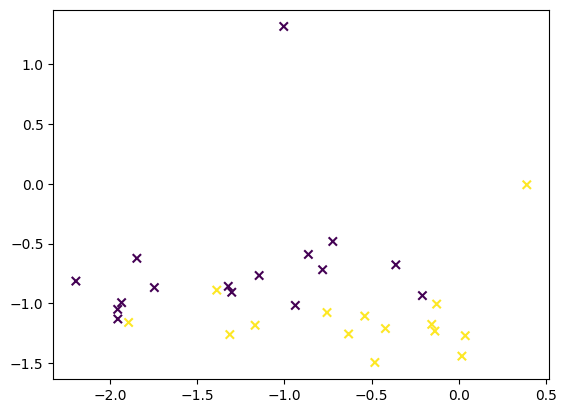

In [6]:
csp = CSP(n_components=2, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(2,time_config, 35, 18)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 624ms/step - loss: 0.1026 - accuracy: 0.9583
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1019 - accuracy: 0.9583
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1011 - accuracy: 0.9583
Epoch 4/15
1/1 [==============================] - 0s 11ms/step - loss: 0.1004 - accuracy: 0.9583
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.0997 - accuracy: 0.9583
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.0990 - accuracy: 0.9583
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.0982 - accuracy: 0.9583
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.0975 - accuracy: 0.9583
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.0968 - accuracy: 0.9583
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.0961 - accuracy: 0.9583
Epoch 11/15
1/1 [==================

1/1 [==============================] - 0s 134ms/step - loss: 0.1490 - accuracy: 0.8571
Epoch 1/15
1/1 [==============================] - 1s 604ms/step - loss: 0.2412 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2401 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2389 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 19ms/step - loss: 0.2377 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2354 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2343 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2331 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2320 - accuracy: 0.7500
Epoch 10/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.1193 - accuracy: 0.9167
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.2803 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.4303 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4294 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4284 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4275 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4265 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2518 - accuracy: 0.7083
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2511 - accuracy: 0.7083
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2505 - accuracy: 0.7083
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.7083
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2492 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2486 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2480 - accuracy: 0.7083
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2473 - accuracy: 0.7083
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.7500
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.7917
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3971 - accuracy: 0.1667
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3955 - accuracy: 0.1667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3939 - accuracy: 0.1667
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.1667
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3907 - accuracy: 0.1667
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.1667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.1667
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2547 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 0s 477ms/step - loss: 0.5361 - accuracy: 0.0833
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.0833
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3898 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3885 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.3265 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.1938 - accuracy: 0.9583
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9583
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1921 - accuracy: 0.9583
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1916 - accuracy: 0.9583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1910 - accuracy: 0.9583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1904 - accuracy: 0.9583
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.1502 - accuracy: 0.8750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1494 - accuracy: 0.8750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1486 - accuracy: 0.8750
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1478 - accuracy: 0.8750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.8750
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1461 - accuracy: 0.8750
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1452 - accuracy: 0.8750
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1444 - accuracy: 0.8750
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1435 - accuracy: 0.8750
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.8750
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.2500
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.2500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2734 - accuracy: 0.2500
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.2500
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.2500
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.2500
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2714 - accuracy: 0.2500
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.2500
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2745 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.2688 - accuracy: 0.3333
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1796 - accuracy: 0.9583
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1791 - accuracy: 0.9583
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1787 - accuracy: 0.9583
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.1646 - accuracy: 0.8571
Epoch 1/15
1/1 [==============================] - 1s 517ms/step - loss: 0.2911 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2863 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2851 - accuracy: 0.4583
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 623ms/step - loss: 0.1776 - accuracy: 0.8750
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.8750
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1767 - accuracy: 0.8750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.8750
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1757 - accuracy: 0.8750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1753 - accuracy: 0.8750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1748 - accuracy: 0.8750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1743 - accuracy: 0.8750
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1739 - accuracy: 0.8750
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.8750
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2509 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.5417
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2462 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2400 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2385 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2370 - accuracy: 0.5833
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.1821 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1804 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1796 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2468 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 520ms/step - loss: 0.2332 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2320 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2307 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2295 - accuracy: 0.5833
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 114ms/step - loss: 0.3015 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.1924 - accuracy: 0.8750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1918 - accuracy: 0.8750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1913 - accuracy: 0.8750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1907 - accuracy: 0.8750
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.8750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1896 - accuracy: 0.8750
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1891 - accuracy: 0.8750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1885 - accuracy: 0.8750
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1880 - accuracy: 0.8750
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3530 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3517 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3480 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3467 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3443 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3430 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3418 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.4800 - accuracy: 0.0833
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4779 - accuracy: 0.0833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4758 - accuracy: 0.0833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4737 - accuracy: 0.0833
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4716 - accuracy: 0.0833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.0833
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.3571 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 529ms/step - loss: 0.4127 - accuracy: 0.2500
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.2917
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4095 - accuracy: 0.2917
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1910 - accuracy: 0.7083
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.1776 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 525ms/step - loss: 0.2545 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2532 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2508 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2483 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2458 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.5115 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5107 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5082 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5073 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5056 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5048 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.1238 - accuracy: 0.9583
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1231 - accuracy: 0.9583
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1224 - accuracy: 0.9583
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1217 - accuracy: 0.9583
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1211 - accuracy: 0.9583
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1204 - accuracy: 0.9583
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1197 - accuracy: 0.9583
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.1279 - accuracy: 1.0000
Epoch 1/15
1/1 [==============================] - 1s 516ms/step - loss: 0.3619 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.4167
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.1283 - accuracy: 0.8333
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1275 - accuracy: 0.8333
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.1685 - accuracy: 0.8571
Epoch 1/15
1/1 [==============================] - 1s 561ms/step - loss: 0.2585 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2574 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2564 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2545 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2525 - accuracy: 0.4583
Epoch 8/15
1/1 [=============================

In [12]:
dwt_test_classifiers(2,'db5',time_config)

Epoch 1/15
1/1 [==============================] - 1s 532ms/step - loss: 0.2371 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2353 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2344 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2335 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2326 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2299 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2290 - accuracy: 0.6250
Epoch 11/15
1/1 [===================

1/1 [==============================] - 0s 6ms/step - loss: 0.2971 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2944 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2930 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2889 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2861 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2976 - accuracy: 0.5714
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2926 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2905 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.3766 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 533ms/step - loss: 0.2505 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2481 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2469 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2458 - accuracy: 0.6250
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 115ms/step - loss: 0.3318 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 1s 507ms/step - loss: 0.2097 - accuracy: 0.7083
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2085 - accuracy: 0.7083
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.7083
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2062 - accuracy: 0.7083
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2051 - accuracy: 0.7083
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2040 - accuracy: 0.7083
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2028 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2017 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2006 - accuracy: 0.7083
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2482 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2451 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2430 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2410 - accuracy: 0.6250
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3229 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3211 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3192 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3174 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.3844 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.2740 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2727 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2714 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2701 - accuracy: 0.5417
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 118ms/step - loss: 0.3103 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 541ms/step - loss: 0.3169 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3157 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3145 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3133 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.5417
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3088 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3077 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 0.3704 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3674 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3659 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3645 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3630 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3602 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3587 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3573 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2007 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1997 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1987 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1977 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2881 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 503ms/step - loss: 0.3557 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3518 - accuracy: 0.4167
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2394 - accuracy: 0.7083
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2594 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 0s 473ms/step - loss: 0.2871 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2854 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2837 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2820 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2787 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2225 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2300 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2275 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2956 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 521ms/step - loss: 0.2791 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.4583
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2444 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 0s 488ms/step - loss: 0.3569 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3559 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3538 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3518 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3508 - accuracy: 0.4583
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3460 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3407 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3371 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3353 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3334 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3316 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3298 - accuracy: 0.3333
Epoch 12/15
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 0.2965 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2953 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2941 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.5417
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 1s 549ms/step - loss: 0.2040 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 0s 495ms/step - loss: 0.2064 - accuracy: 0.5833
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2840 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2826 - accuracy: 0.4583
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.4583
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.3609 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 1s 572ms/step - loss: 0.2709 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2679 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.5000
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 548ms/step - loss: 0.2401 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2359 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2331 - accuracy: 0.5417
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2303 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2289 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2680 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.4583
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.4583
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.2023 - accuracy: 0.8571
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3055 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3043 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2987 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 539ms/step - loss: 0.3295 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3281 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3267 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3252 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3238 - accuracy: 0.3333
Epoch 6/15
1/1 [===========================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,400,200)

In [14]:
csp_test_classifiers(2,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_14992\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Epoch 1/15
1/1 [==============================] - 1s 544ms/step - loss: 0.2029 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2018 - accuracy: 0.7200
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2007 - accuracy: 0.7600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1996 - accuracy: 0.7600
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1985 - accuracy: 0.7600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1974 - accuracy: 0.7600
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1963 - accuracy: 0.7600
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1952 - accuracy: 0.7600
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1941 - accuracy: 0.7600
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1930 - accuracy: 0.7600
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2865 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2855 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2845 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2835 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2825 - accuracy: 0.5200
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.5200
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2805 - accuracy: 0.5200
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.5200
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.3229 - accuracy: 0.2857
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.5600
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2295 - accuracy: 0.5600
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.5600
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.5600
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2336 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 554ms/step - loss: 0.1565 - accuracy: 0.8800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1559 - accuracy: 0.8800
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.8800
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.8800
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1541 - accuracy: 0.8800
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 115ms/step - loss: 0.2332 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 548ms/step - loss: 0.2408 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2386 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2375 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2364 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2343 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2332 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2321 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.6400
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.6400
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2477 - accuracy: 0.6400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.6400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2463 - accuracy: 0.6400
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.6400
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.6400
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2443 - accuracy: 0.6400
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.6400
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2431 - accuracy: 0.6400
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.4400
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.4400
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.4400
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2526 - accuracy: 0.4400
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.4400
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2573 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 551ms/step - loss: 0.1727 - accuracy: 0.8400
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1723 - accuracy: 0.8400
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1720 - accuracy: 0.8400
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1716 - accuracy: 0.8800
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 134ms/step - loss: 0.3277 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 523ms/step - loss: 0.4402 - accuracy: 0.2800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4391 - accuracy: 0.2400
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.2400
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.2400
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4360 - accuracy: 0.2400
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.2400
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4339 - accuracy: 0.2400
Epoch 8/15
1/1 [==============================] - 0s 14ms/step - loss: 0.4328 - accuracy: 0.2400
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4318 - accuracy: 0.2400
Epoch 10/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.1200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4930 - accuracy: 0.1200
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4920 - accuracy: 0.1600
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4911 - accuracy: 0.1600
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4901 - accuracy: 0.1600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.1600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4882 - accuracy: 0.1600
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4872 - accuracy: 0.1600
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.1600
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4853 - accuracy: 0.2000
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 4ms/step - loss: 0.3620 - accuracy: 0.3200
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3607 - accuracy: 0.3200
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3595 - accuracy: 0.3200
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3583 - accuracy: 0.3200
Epoch 13/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3571 - accuracy: 0.3200
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3559 - accuracy: 0.3200
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.1966 - accuracy: 0.8571
Epoch 1/15
1/1 [==============================] - 1s 506ms/step - loss: 0.4642 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4628 - accuracy: 0.1600
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4613 - accuracy: 0.1600
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1704 - accuracy: 0.9200
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2534 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 539ms/step - loss: 0.2748 - accuracy: 0.2800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.3200
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.3200
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2705 - accuracy: 0.3200
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.3200
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2676 - accuracy: 0.3200
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.3200
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.3200
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2700 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2690 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2681 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2671 - accuracy: 0.6400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.6400
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 0.6800
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2642 - accuracy: 0.6800
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2633 - accuracy: 0.6800
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.6800
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.5200
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2407 - accuracy: 0.5200
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2397 - accuracy: 0.5200
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.5200
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2376 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2426 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 526ms/step - loss: 0.1281 - accuracy: 0.8000
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1275 - accuracy: 1.0000
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.5600
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.5600
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2650 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 603ms/step - loss: 0.4708 - accuracy: 0.1600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4699 - accuracy: 0.1600
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.1600
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.1600
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.1600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4660 - accuracy: 0.1600
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4650 - accuracy: 0.1600
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3400 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3378 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3367 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3357 - accuracy: 0.4000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.4000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3336 - accuracy: 0.4000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.4000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.4000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3304 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9600
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1963 - accuracy: 0.9600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.9600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1946 - accuracy: 0.9600
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1939 - accuracy: 0.9600
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1931 - accuracy: 0.9600
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.9600
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1915 - accuracy: 0.9600
Epoch 15/15
1/1 [==============================] - 0s 138ms/step - loss: 0.2646 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 718ms/step - loss: 0.1975 - accuracy: 0.9200
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2999 - accuracy: 0.3600
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2990 - accuracy: 0.3600
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2981 - accuracy: 0.3600
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2585 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 600ms/step - loss: 0.3073 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.3600
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.3600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.3600
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3037 - accuracy: 0.3600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.3600
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 564ms/step - loss: 0.2033 - accuracy: 0.8000
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2025 - accuracy: 0.8000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2017 - accuracy: 0.8000
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2009 - accuracy: 0.8000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2000 - accuracy: 0.8400
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.8800
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1984 - accuracy: 0.8800
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.8800
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1967 - accuracy: 0.8800
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1959 - accuracy: 0.8800
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.1495 - accuracy: 0.9200
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1488 - accuracy: 0.9200
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1482 - accuracy: 0.9200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1476 - accuracy: 0.9200
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9200
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1463 - accuracy: 0.9200
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1457 - accuracy: 0.9200
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1451 - accuracy: 0.9200
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1444 - accuracy: 0.9200
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2006 - accuracy: 0.7143
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2934 - accuracy: 0.5200
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.5200
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2915 - accuracy: 0.5200
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2905 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2995 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.1328 - accuracy: 0.8000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1322 - accuracy: 0.8000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.8000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1311 - accuracy: 0.8000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1305 - accuracy: 0.8000
Epoch 6/15
1/1 [===========================

In [15]:
dwt_test_classifiers(3,'db1',time_config)

Epoch 1/15
1/1 [==============================] - 0s 480ms/step - loss: 0.3718 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3701 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3667 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.4400
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.4400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.4400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.4400
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3565 - accuracy: 0.4400
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.6000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2227 - accuracy: 0.6000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.6000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.6000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2451 - accuracy: 0.4286
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.5600
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2606 - accuracy: 0.5600
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.5600
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2583 - accuracy: 0.5600
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.3555 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 526ms/step - loss: 0.2924 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2911 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2898 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2885 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2872 - accuracy: 0.5200
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 113ms/step - loss: 0.2570 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 0s 495ms/step - loss: 0.2744 - accuracy: 0.4400
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.4400
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2715 - accuracy: 0.4400
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2700 - accuracy: 0.4400
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2685 - accuracy: 0.4400
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.4800
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2787 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.6000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2742 - accuracy: 0.6000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2727 - accuracy: 0.6000
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2712 - accuracy: 0.6000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.6000
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2062 - accuracy: 0.7200
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2050 - accuracy: 0.7200
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2038 - accuracy: 0.7200
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2027 - accuracy: 0.7200
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.7200
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2392 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 548ms/step - loss: 0.2434 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2418 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2402 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2387 - accuracy: 0.4800
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 118ms/step - loss: 0.1529 - accuracy: 0.8571
Epoch 1/15
1/1 [==============================] - 1s 596ms/step - loss: 0.3316 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3301 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3287 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3259 - accuracy: 0.5600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.5600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3232 - accuracy: 0.5600
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.5600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3535 - accuracy: 0.3600
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3518 - accuracy: 0.3600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.3600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.3600
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3465 - accuracy: 0.3600
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3447 - accuracy: 0.3600
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3429 - accuracy: 0.3600
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.4000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.4000
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2884 - accuracy: 0.6400
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.6400
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.6400
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2850 - accuracy: 0.6400
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.6400
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2827 - accuracy: 0.6400
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.2917 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2790 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2781 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.4800
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.7200
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3338 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.2673 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2646 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.5200
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2590 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2576 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2998 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2960 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2941 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.4800
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.4800
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2884 - accuracy: 0.4800
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2865 - accuracy: 0.4800
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2995 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.4800
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2962 - accuracy: 0.4800
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.4800
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.4800
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2913 - accuracy: 0.4800
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.4800
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.4673 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 0s 485ms/step - loss: 0.2695 - accuracy: 0.6000
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2682 - accuracy: 0.6000
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.5200
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.3254 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 0s 485ms/step - loss: 0.2262 - accuracy: 0.6800
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.6800
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.6800
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2227 - accuracy: 0.6800
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.6800
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2205 - accuracy: 0.6800
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2193 - accuracy: 0.6800
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2742 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2714 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2700 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2657 - accuracy: 0.4800
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2643 - accuracy: 0.4800
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.4800
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3326 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3309 - accuracy: 0.4800
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.4800
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3276 - accuracy: 0.4800
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3259 - accuracy: 0.4800
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3243 - accuracy: 0.4800
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.4800
Epoch 15/15
1/1 [==============================] - 0s 107ms/step - loss: 0.3484 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 0s 478ms/step - loss: 0.2680 - accuracy: 0.5200
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.4800
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2726 - accuracy: 0.4800
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.4800
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.2682 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 530ms/step - loss: 0.2649 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.5200
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5600
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 507ms/step - loss: 0.4197 - accuracy: 0.3600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4174 - accuracy: 0.3600
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4152 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4086 - accuracy: 0.4000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.4000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4042 - accuracy: 0.4000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4020 - accuracy: 0.4000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3998 - accuracy: 0.4000
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2704 - accuracy: 0.6400
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2695 - accuracy: 0.6400
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2686 - accuracy: 0.6400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2677 - accuracy: 0.6400
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.6400
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2659 - accuracy: 0.6400
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2651 - accuracy: 0.6400
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2642 - accuracy: 0.6400
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 0.6400
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2903 - accuracy: 0.1429
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2596 - accuracy: 0.4800
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.4800
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2569 - accuracy: 0.4800
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.5200
Epoch 15/15
1/1 [==============================] - 0s 107ms/step - loss: 0.2404 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3778 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3759 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3740 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.4000
Epoch 6/15
1/1 [===========================

In [7]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [8]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [9]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [10]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
